**ЛАБОРАТОРНАЯ РАБОТА 8. ПОСТРОЕНИЕ ПАЙПЛАЙНА 
ОДНОМЕРНОЙ РЕГРЕССИИ**

**В качестве наборов ресурсов, я использую Real estate valuation data set.xlsx**

**Описание набора**

**Оценка недвижимости - это регрессионная задача. Набор рыночных исторических данных для оценки недвижимости собран в районе Синдиан, Нью-Тайбэй, Тайвань. Набор данных был случайным образом разделён на обучающую выборку (2/3 образцов) и тестовую выборку (1/3 образцов).**

**Переменные таблицы:**

**Ввод данных осуществляется следующим образом**

 **No - ID**
 
 **X1 transaction date - Дата транзакции X1 = дата сделки (например, 2013.250=март 2013, 2013.500=июнь 2013 и т. д.)**
 
 **X2 house age - Возраст дома X2 = возраст дома (единица измерения: год)**
 
 **X3 distance to the nearest MRT station - Расстояние в 3 раза до ближайшей станции метро = расстояние до ближайшей станции метро (единица измерения: метр)**

 **X4 number of convenience stores - Количество круглосуточных магазинов X4 = количество магазинов шаговой доступности в радиусе пешей доступности (целое число)**
 
 **X5 latitude - X5 latitude = географическая координата, широта. (единица измерения: градус)**
 
 **X6 longitude - X6 долгота =географическая координата, долгота. (единица измерения: градус)**
 
 **Результат выглядит следующим образом**
 
 **Y house price of unit area - Y = цена за квадратный метр жилья (10000 новых тайваньских долларов/пин, где пин — местная единица измерения, 1 пин = 3,3 квадратного метра)**



**Для выполнения 8 лабораторной работы, необходимо - Постройте модель регрессии.**

Первые строки набора данных:
   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3

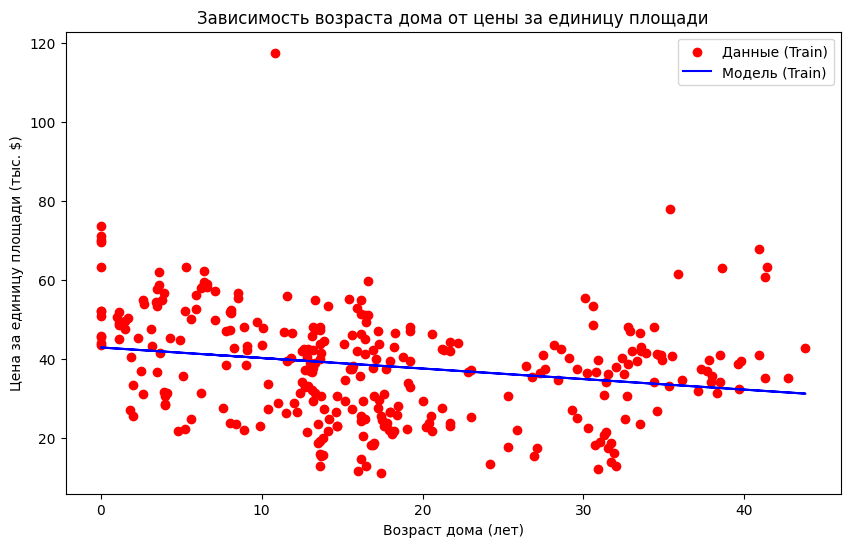

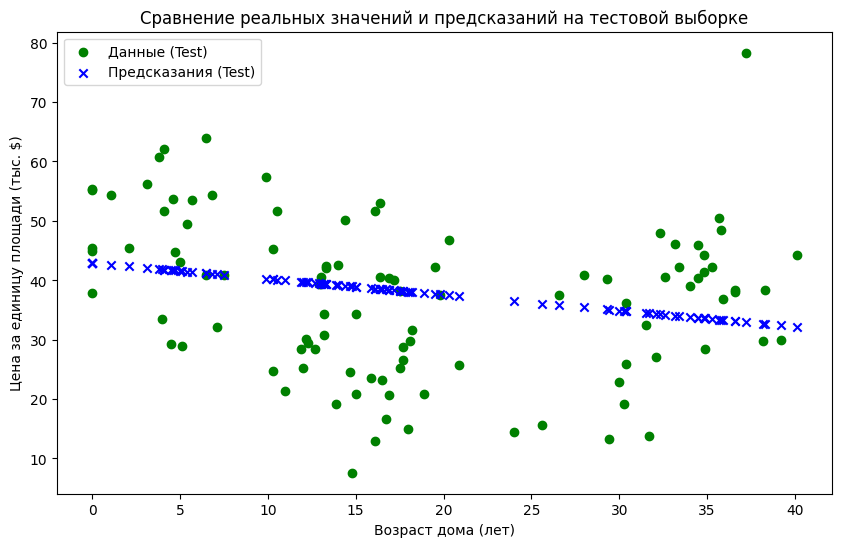

In [15]:
# Импорт необходимых библиотек
import numpy as np  # Работа с числовыми массивами и математическими операциями
import pandas as pd  # Работа с табличными данными
import matplotlib.pyplot as plt  # Построение графиков
from sklearn.model_selection import train_test_split  # Разделение данных на обучающую и тестовую выборки
from sklearn.linear_model import LinearRegression  # Линейная регрессия
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Метрики для оценки модели

# Загрузка данных
file_path = 'Real estate valuation data set.xlsx'  
dataset = pd.read_excel(file_path)  # Чтение данных из Excel-файла
print("Первые строки набора данных:")
print(dataset.head())  # Выводим первые 5 строк данных для проверки

# Выделение признака и целевой переменной
# В данном случае признак (X) — возраст дома ('X2 house age'), а целевая переменная (y) — цена за единицу площади
X = dataset.loc[:, ['X2 house age']]  # Выбираем один столбец в качестве предиктора
y = dataset['Y house price of unit area']  # Целевая переменная — стоимость недвижимости

# Проверка данных
print("\nМатрица признаков (первые 5 строк):")
print(X[:5])  # Выводим первые 5 строк признаков
print("\nЦелевая переменная (первые 5 значений):")
print(y[:5])  # Выводим первые 5 строк целевой переменной

# Разделение выборки на обучающую и тестовую части
# Разбиваем данные на обучающую (75%) и тестовую (25%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Обучение модели линейной регрессии
regressor = LinearRegression()  # Создаем модель линейной регрессии
regressor.fit(X_train, y_train)  # Обучаем модель на тренировочной выборке

# Предсказание тестовых данных
y_pred = regressor.predict(X_test)  # Выполняем предсказания для тестовой выборки
print("\nПредсказанные значения на тестовой выборке:")
print(y_pred[:5])  # Отображаем первые 5 предсказанных значений для наглядности

# Оценка модели
mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка
mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
print(f"\nСреднеквадратичная ошибка (MSE): {mse:.2f}")  # MSE показывает среднее отклонение квадрата ошибки
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")  # MAE показывает среднее абсолютное отклонение

# Визуализация результатов на обучающих данных
plt.figure(figsize=(10, 6))  # Указываем размер графика
plt.scatter(X_train, y_train, color='red', label='Данные (Train)')  # Красные точки — реальные значения на обучающей выборке
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Модель (Train)')  # Синяя линия — предсказания модели
plt.title('Зависимость возраста дома от цены за единицу площади')  # Заголовок графика
plt.xlabel('Возраст дома (лет)')  # Метка оси X
plt.ylabel('Цена за единицу площади (тыс. $)')  # Метка оси Y
plt.legend()  # Добавляем легенду
plt.show()  # Отображаем график

# Визуализация предсказаний на тестовых данных
plt.figure(figsize=(10, 6))  # Указываем размер графика
plt.scatter(X_test, y_test, color='green', label='Данные (Test)')  # Зеленые точки — реальные значения на тестовой выборке
plt.scatter(X_test, y_pred, color='blue', label='Предсказания (Test)', marker='x')  # Синие крестики — предсказанные значения
plt.title('Сравнение реальных значений и предсказаний на тестовой выборке')  # Заголовок графика
plt.xlabel('Возраст дома (лет)')  # Метка оси X
plt.ylabel('Цена за единицу площади (тыс. $)')  # Метка оси Y
plt.legend()  # Добавляем легенду
plt.show()  # Отображаем график


**Выводы**

**Зависимость возраста дома от цены за единицу площади**

*Линия модели показывает слабую отрицательную зависимость между возрастом дома и ценой за единицу площади, что видно по лёгкому наклону линии вниз.*

*Точки распределены относительно модели с большим разбросом. Это говорит о том, что возраст дома, вероятно, не является единственным важным фактором, определяющим цену за единицу площади.*

*Высокий уровень шума в данных может указывать на то, что дополнительные переменные или нелинейные модели могли бы лучше описать взаимосвязь.*

Уровень шума — это насколько точки (реальные данные) на графике отличаются от линии модели.

**Сравнение реальных значений и предсказаний на тестовой выборке**

*Предсказания модели (синие крестики) сгруппированы вдоль прямой линии, что указывает на ограниченную сложность модели линейной регрессии.*

*Реальные значения (зелёные точки) значительно отклоняются от прогнозируемых значений, что говорит о наличии ошибок не учтённых в модели.*

*На графике видно, что модель плохо обрабатывает экстремальные значения (например, для домов старше 30 лет), поскольку реальные цены могут значительно отличаться от прогнозируемых.*